<a href="https://colab.research.google.com/github/TatanPerez/4101135-Modelado_Simulacion/blob/main/2_One-Dimensional%20Flows/2_2_Flows_on_the_Line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 2 - Simulations (Numerical Approximation of Solutions)**

Wilmer Sebastian Perez Cuastumal

Universidad Nacional de Colombia

07/09/2025

## **2.1. A Geometrical Way of Thinking**

**Sistema:** **$\dot{x} = \sin(x)$**

**Enunciado:** Analizar el sistema dinámico unidimensional dado por la ecuación diferencial $\dot{x} = \sin(x)$. Determinar los puntos fijos, su estabilidad mediante análisis lineal, e interpretar el flujo sobre la recta real.

**Resolución Matemática: Puntos Fijos**

La ecuación diferencial:

$$
\dot{x} = \sin(x)
$$

tiene una solución exacta (ya resuelta en el texto) de la forma:

$$
t = \ln\left| \frac{\csc x_0 + \cot x_0}{\csc x + \cot x} \right|
$$

donde $x_0 = x(0)$ es la condición inicial.

Los puntos fijos se encuentran resolviendo la ecuación $\dot{x} = f(x) = 0$.
En este caso, $\sin(x) = 0$.
Las soluciones generales para esta ecuación son $x = k\pi$, donde $k$ es un número entero ($\dots, -2\pi, -\pi, 0, \pi, 2\pi, \dots$).

**Estabilidad (Análisis Lineal)**

Para determinar la estabilidad de los puntos fijos, analizamos el signo de la derivada de $f(x)$ evaluada en cada punto fijo.
La derivada de $f(x) = \sin(x)$ es $f'(x) = \cos(x)$.

Evaluamos $f'(x)$ en los puntos fijos $x^* = k\pi$:
$f'(k\pi) = \cos(k\pi)$.

*   Si $k$ es un número par ($k = 2n$ para $n \in \mathbb{Z}$), entonces $\cos(2n\pi) = 1$.
    En este caso, $f'(x^*) > 0$, lo que indica que los puntos fijos de la forma $x^* = 2n\pi$ (como $0, 2\pi, -2\pi, \dots$) son **inestables**.

*   Si $k$ es un número impar ($k = 2n+1$ para $n \in \mathbb{Z}$), entonces $\cos((2n+1)\pi) = -1$.
    En este caso, $f'(x^*) < 0$, lo que indica que los puntos fijos de la forma $x^* = (2n+1)\pi$ (como $\pi, -\pi, 3\pi, -3\pi, \dots$) son **estables**.

**Interpretación y Flujo en la Recta Real**

El signo de $\dot{x} = \sin(x)$ determina la dirección del flujo en la recta real:

*   Si $\sin(x) > 0$, entonces $\dot{x} > 0$, lo que significa que $x$ aumenta con el tiempo (flujo hacia la derecha). Esto ocurre en los intervalos $(2n\pi, (2n+1)\pi)$.
*   Si $\sin(x) < 0$, entonces $\dot{x} < 0$, lo que significa que $x$ disminuye con el tiempo (flujo hacia la izquierda). Esto ocurre en los intervalos $((2n+1)\pi, (2n+2)\pi)$.

Los puntos fijos inestables (donde $\sin(x)=0$ y la derivada es positiva) actúan como "fuentes" o repulsores, con el flujo alejándose de ellos. Estos corresponden a $x = 2n\pi$.

Los puntos fijos estables (donde $\sin(x)=0$ y la derivada es negativa) actúan como "sumideros" o atractores, con el flujo dirigiéndose hacia ellos. Estos corresponden a $x = (2n+1)\pi$.

El gráfico del campo escalar $f(x) = \sin(x)$ visualiza esto: cuando la curva está por encima del eje x, el flujo es hacia la derecha; cuando está por debajo, el flujo es hacia la izquierda; y los puntos donde cruza el eje x son los puntos fijos, con su estabilidad determinada por la pendiente en esos puntos (pendiente positiva = inestable, pendiente negativa = estable).

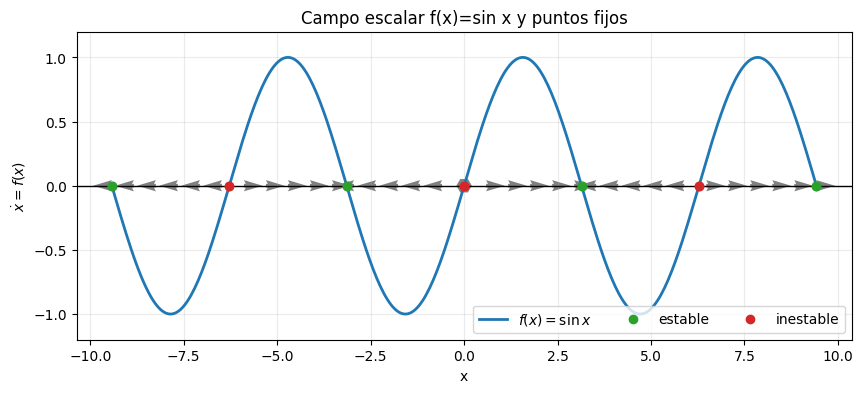

In [28]:
# =============================
# Ejercicio 1: xdot = sin(x)
# Campo en la recta real y flujo
# =============================

import numpy as np
import matplotlib.pyplot as plt

# Dominio para mostrar varias celdas de longitud pi
xmin, xmax = -3*np.pi, 3*np.pi
x = np.linspace(xmin, xmax, 400)
f = np.sin(x)

# Puntos fijos en el rango mostrado
k_vals = np.arange(np.ceil(xmin/np.pi), np.floor(xmax/np.pi)+1).astype(int)
xf = k_vals * np.pi
stability = np.cos(xf)  # <0 estable, >0 inestable

fig, ax = plt.subplots(figsize=(10,4))

# Retrato f(x) vs x (útil para ver signos)
ax.plot(x, f, lw=2, label=r'$f(x)=\sin x$')
ax.axhline(0, color='k', lw=1)

# Marcar puntos fijos en el gráfico del campo escalar
for xstar, sgn in zip(xf, stability):
    if xmin <= xstar <= xmax:
        color = 'tab:green' if sgn < 0 else 'tab:red'
        ax.plot([xstar], [0], 'o', color=color,
                label='estable' if sgn<0 else 'inestable')

# Quitar entradas duplicadas de la leyenda
handles, labels = ax.get_legend_handles_labels()
uniq = dict(zip(labels, handles))
ax.legend(uniq.values(), uniq.keys(), ncols=3, loc='lower right')

ax.set_xlabel('x')
ax.set_ylabel(r'$\dot x = f(x)$')
ax.set_title('Campo escalar f(x)=sin x y puntos fijos')
ax.grid(True, alpha=0.25)

# ---- Flujo sobre la recta real (flechas en y=0) ----
# Posiciones donde dibujar flechas
xq = np.linspace(xmin, xmax, 33)
uq = np.sign(np.sin(xq))  # dirección (signo de f)
yq = np.zeros_like(xq)
vq = np.zeros_like(xq)    # no hay componente vertical (flujo en la línea)

# Dibujar flechas en el mismo eje que el campo escalar
ax.quiver(xq, yq, uq, vq, angles='xy', scale_units='xy', scale=2, width=0.02, color='gray')

# Marcar puntos fijos en el gráfico del flujo (opcional, ya están en el campo escalar)
for xstar, sgn in zip(xf, stability):
    if xmin <= xstar <= xmax:
        color = 'tab:green' if sgn < 0 else 'tab:red'
        ax.plot([xstar], [0], 'o', color=color)

# Ajustar los límites del eje y para acomodar las flechas si es necesario
ax.set_ylim(-1.2, 1.2) # Descomentar y ajustar si las flechas no se ven bien

plt.show()

📌 Contexto general

La ecuación diferencial:

$$
\dot{x} = \sin(x)
$$

tiene una solución exacta (ya resuelta en el texto) de la forma:

$$
t = \ln\left| \frac{\csc x_0 + \cot x_0}{\csc x + \cot x} \right|
$$

donde $x_0 = x(0)$ es la condición inicial.

Queremos:

* * *

**Parte (a)**

Demostrar que con $x_0 = \frac{\pi}{4}$, se puede invertir la solución y obtener:

$$
x(t) = 2 \arctan\left( \frac{e^t}{1 + \sqrt{2}} \right)
$$

* * *

Paso 1: Reescribir la solución

Partimos de:

$$
t = \ln\left| \frac{\csc x_0 + \cot x_0}{\csc x + \cot x} \right|
\quad \Rightarrow \quad
\frac{\csc x + \cot x}{\csc x_0 + \cot x_0} = e^{-t}
$$

* * *

Paso 2: Usar la identidad trigonométrica

Sabemos que:

$$
\csc x + \cot x = \frac{1 + \cos x}{\sin x}
\quad \Rightarrow \quad
\frac{\sin x}{1 + \cos x} = \frac{1}{\csc x + \cot x}
$$

Sustituyendo:

$$
\frac{\sin x}{1 + \cos x} = \frac{e^t}{\csc x_0 + \cot x_0}
$$

* * f *

Paso 3: Aplicar identidad de tangente

Usamos la identidad:

$$
\tan\left( \frac{x}{2} \right) = \frac{\sin x}{1 + \cos x}
$$

Entonces:

$$
\tan\left( \frac{x}{2} \right) = \frac{e^t}{\csc x_0 + \cot x_0}
\quad \Rightarrow \quad
x(t) = 2 \arctan\left( \frac{e^t}{\csc x_0 + \cot x_0} \right)
$$

* * *

Paso 4: Evaluar con $x_0 = \frac{\pi}{4}$

Calculamos:

- $\sin(\pi/4) = \cos(\pi/4) = \frac{\sqrt{2}}{2}$
- $\csc(\pi/4) = \frac{1}{\sin(\pi/4)} = \sqrt{2}$
- $\cot(\pi/4) = 1$

Entonces:

$$
\csc x_0 + \cot x_0 = \sqrt{2} + 1
\quad \Rightarrow \quad
x(t) = 2 \arctan\left( \frac{e^t}{1 + \sqrt{2}} \right)
$$

**Conclusión de la Parte (a)**

Observamos que:

$$
\lim_{t \to \infty} x(t) = 2 \arctan(\infty) = \pi
$$

Esto se debe a que:

$$
\arctan(\infty) = \frac{\pi}{2}
\quad \Rightarrow \quad
x(t) \to \pi \quad \text{cuando} \quad t \to \infty
$$

Esto confirma lo mencionado en la imagen, que $x(t) \to \pi$ cuando $t \to \infty$.

<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3200529900.py:16: SyntaxWarning: invalid escape sequence '\p'
  plt.title('Solución explícita con $x_0 = \pi/4$')


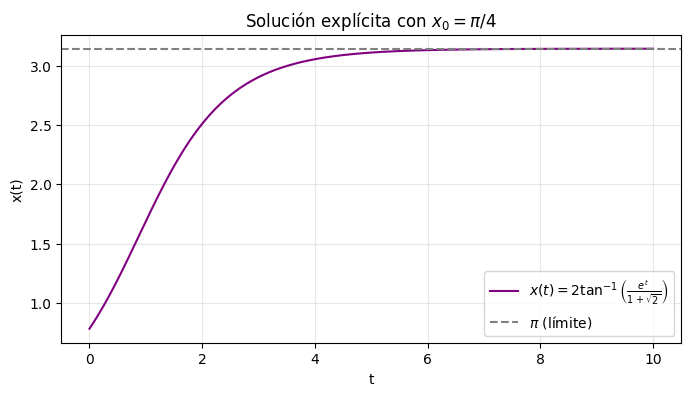

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Solución explícita con x0 = pi/4
def x_explicit(t):
    return 2 * np.arctan(np.exp(t) / (1 + np.sqrt(2)))

t = np.linspace(0, 10, 400)
x_t = x_explicit(t)

plt.figure(figsize=(8, 4))
plt.plot(t, x_t, label=r'$x(t) = 2\tan^{-1}\left(\frac{e^t}{1 + \sqrt{2}}\right)$', color='purple')
plt.axhline(np.pi, color='gray', linestyle='--', label=r'$\pi$ (límite)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Solución explícita con $x_0 = \pi/4$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**Parte (b): Resolver $x(t)$ para cualquier $x_0$**

Partimos de la solución general de la ecuación diferencial $\dot{x} = \sin(x)$ obtenida por integración:

Tenemos:
$$
t = \ln\left| \frac{\csc x_0 + \cot x_0}{\csc x + \cot x} \right|
$$

Esto implica que, al exponenciar ambos lados y reordenar, obtenemos:
$$
\csc x + \cot x = (\csc x_0 + \cot x_0) \cdot e^{-t}
$$

Recordando la identidad trigonométrica $\csc x + \cot x = \frac{1 + \cos x}{\sin x}$, podemos reescribir el lado izquierdo. También sabemos que $\frac{\sin x}{1 + \cos x} = \tan\left(\frac{x}{2}\right)$. Tomando el recíproco de ambos lados de la ecuación:

$$
\frac{1}{\csc x + \cot x} = \frac{1}{(\csc x_0 + \cot x_0) \cdot e^{-t}}
$$

Utilizando la identidad de tangente de medio ángulo:

$$
\tan\left( \frac{x}{2} \right) = \frac{e^t}{\csc x_0 + \cot x_0}
$$

Finalmente, para despejar $x(t)$, aplicamos la función arcotangente (inversa de la tangente) y multiplicamos por 2:

Por lo tanto, para cualquier $x_0$, la solución explícita es:
$$
x(t) = 2 \arctan\left( \frac{e^t}{\csc x_0 + \cot x_0} \right)
$$

<>:22: SyntaxWarning: invalid escape sequence '\d'
<>:22: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2995149327.py:22: SyntaxWarning: invalid escape sequence '\d'
  plt.title('Soluciones de $\dot{x} = \sin x$ para varios $x_0$')


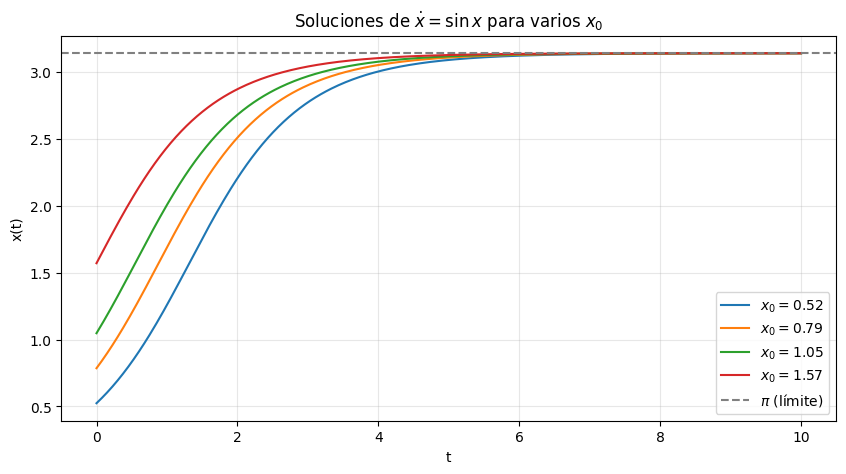

In [30]:
def x_t_general(t, x0):
    sin_x0 = np.sin(x0)
    cos_x0 = np.cos(x0)
    csc_x0 = 1 / sin_x0
    cot_x0 = cos_x0 / sin_x0
    denom = csc_x0 + cot_x0
    return 2 * np.arctan(np.exp(t) / denom)

# Tiempo
t = np.linspace(0, 10, 400)
x0_vals = [np.pi / 6, np.pi / 4, np.pi / 3, np.pi / 2]

plt.figure(figsize=(10, 5))

for x0 in x0_vals:
    xt = x_t_general(t, x0)
    plt.plot(t, xt, label=fr'$x_0 = {x0:.2f}$')

plt.axhline(np.pi, color='gray', linestyle='--', label=r'$\pi$ (límite)')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Soluciones de $\dot{x} = \sin x$ para varios $x_0$')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


## **2.2. Fixed Points and Stability**

Sección 2.2 — Ej. 2.2.3

* * *

### Sistema: $\dot{x} = x - x^3$

* * *

### Enunciado

- Encuentra los puntos fijos y clasifica su estabilidad.
- Dibuja el retrato de fase.
- Simula soluciones numéricas para varias condiciones iniciales.
- Proporciona código.

* * *

### Resolución matemática

La ecuación es:

$$
\dot{x} = x - x^3 = x(1 - x^2).
$$

* * *

### Puntos fijos: $x^* \in \{-1, 0, 1\}$

La derivada es:

$$
f'(x) = 1 - 3x^2.
$$

Evaluamos la derivada en los puntos fijos:

- En $x^* = -1$: $f'(-1) = 1 - 3(1) = -2 < 0$ **estable**.
- En $x^* = 0$: $f'(0) = 1 - 3(0) = 1 > 0$ **inestable**.
- En $x^* = 1$: $f'(1) = 1 - 3(1) = -2 < 0$ **estable**.

* * *

### Interpretación

- Para $|x| < 1$: $x - x^3 > 0$ si $x \in (0, 1)$ y $< 0$ si $x \in (-1, 0)$; el flujo va hacia $x = \pm 1$ y desde $x = 0$.
- Para $|x| > 1$: El término $-x^3$ domina y empuja hacia $\pm 1$ (según el lado).
- Estructura: **bistabilidad** con atractores en $-1$ y $1$ separados por el punto silla/repulsor en $0$.

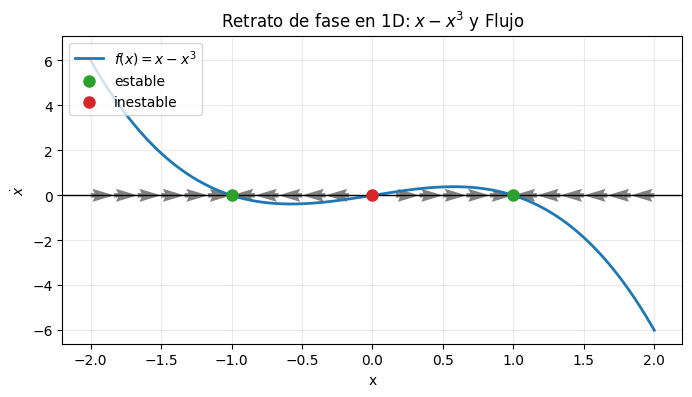

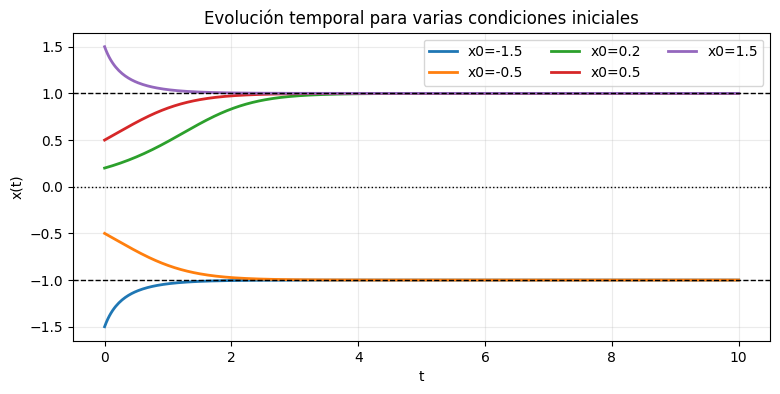

In [31]:
# ==========================================
# Ejercicio 2: xdot = x - x^3
# Fase 1D + simulaciones con solve_ivp
# ==========================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f(t, x):
    return x - x**3

# --- Retrato f(x) vs x y Flujo sobre la recta ---
x = np.linspace(-2.0, 2.0, 400)
fx = x - x**3

xf = np.array([-1.0, 0.0, 1.0])
stab = 1 - 3*xf**2  # <0 estable, >0 inestable

fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot del Retrato f(x) vs x
ax1.plot(x, fx, lw=2, label=r'$f(x)=x-x^3$')
ax1.axhline(0, color='k', lw=1)
for xstar, sgn in zip(xf, stab):
    color = 'tab:green' if sgn < 0 else 'tab:red'
    ax1.plot([xstar], [0], 'o', ms=8, color=color,
             label='estable' if sgn < 0 else 'inestable')

handles, labels = ax1.get_legend_handles_labels()
uniq = dict(zip(labels, handles))
ax1.legend(uniq.values(), uniq.keys(), loc='upper left')
ax1.set_xlabel('x')
ax1.set_ylabel(r'$\dot x$')
ax1.set_title('Retrato de fase en 1D: $x - x^3$ y Flujo')
ax1.grid(True, alpha=0.25)
ax1.set_xticks(np.linspace(-2, 2, 9)) # Mejorar los ticks del eje x

# Plot del Flujo sobre la recta (flechas en y=0) en el mismo eje
xq = np.linspace(-2, 2, 25)
uq = np.sign(xq - xq**3)  # dirección
yq = np.zeros_like(xq)
vq = np.zeros_like(xq)
ax1.quiver(xq, yq, uq, vq, angles='xy', scale_units='xy', scale=6, width=0.007, color='gray')

# Ajustar límites del eje y si es necesario para acomodar las flechas
ax1.set_ylim(ax1.get_ylim()[0], ax1.get_ylim()[1] + 0.5) # Ajustar el límite superior para las flechas

plt.show()

# --- Simulaciones numéricas ---
ICs = [-1.5, -0.5, 0.2, 0.5, 1.5]
t_span = (0, 10)
t_eval = np.linspace(*t_span, 400)

sols = []
for x0 in ICs:
    sol = solve_ivp(f, t_span, [x0], t_eval=t_eval, rtol=1e-9, atol=1e-12)
    sols.append((x0, sol))

fig, ax = plt.subplots(figsize=(9,4))
for x0, sol in sols:
    ax.plot(sol.t, sol.y[0], lw=2, label=f'x0={x0}')
ax.axhline(-1, color='k', ls='--', lw=1)
ax.axhline(0, color='k', ls=':',  lw=1)
ax.axhline(1, color='k', ls='--', lw=1)
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title('Evolución temporal para varias condiciones iniciales')
ax.legend(ncols=3)
ax.grid(True, alpha=0.25)
plt.show()

##  **2.3 Population Growth**

Sección 2.3 — Ej. 2.3.1

### Sistema: $\dot{N} = rN\left(1 - \frac{N}{K}\right)$

* * *

### Enunciado

- Resuelve la ecuación logística $\dot{N} = rN\left(1 - \frac{N}{K}\right)$ analíticamente para una condición inicial arbitraria $N_0$.
- Realiza dos métodos de solución:
    - (a) Separación de variables e integración, utilizando fracciones parciales.
    - (b) Cambio de variables $x = \frac{1}{N}$ y resuelve la ecuación resultante para $x$.

* * *

### Resolución matemática

La ecuación logística es:

$$
\dot{N} = rN\left(1 - \frac{N}{K}\right)
$$

#### Caso (a): Separación de variables y fracciones parciales

Reescribimos la ecuación como:

$$
\frac{dN}{dt} = rN - \frac{rN^2}{K}
$$

Separando las variables:

$$
\frac{dN}{N\left(1 - \frac{N}{K}\right)} = r \, dt
$$

Usamos fracciones parciales para descomponer el denominador:

$$
\frac{1}{N\left(1 - \frac{N}{K}\right)} = \frac{A}{N} + \frac{B}{1 - \frac{N}{K}}
$$

Al resolver las fracciones parciales:

$$
\frac{1}{N\left(1 - \frac{N}{K}\right)} = \frac{K}{K - N} - \frac{K}{N}
$$

Ahora integramos ambos lados:

$$
\int \left( \frac{K}{K - N} - \frac{K}{N} \right) dN = \int r \, dt
$$

La integral en el lado izquierdo es:

$$
K \ln|K - N| - K \ln|N| = rt + C
$$

Simplificando:

$$
K \ln\left(\frac{K - N}{N}\right) = rt + C
$$

Exponenciamos ambos lados:

$$
\frac{K - N}{N} = e^{\frac{rt + C}{K}}
$$

Definimos $C' = e^{\frac{C}{K}}$, y obtenemos la solución implícita:

$$
\frac{K}{N} - 1 = C'e^{rt}
$$

Finalmente, despejamos $N(t)$:

$$
N(t) = \frac{K}{1 + C'e^{-rt}}
$$

Utilizando la condición inicial $N(0) = N_0$, obtenemos:

$$
C' = \frac{K - N_0}{N_0}
$$

Por lo tanto, la solución completa es:

$$
N(t) = \frac{K}{1 + \frac{K - N_0}{N_0} e^{-rt}}
$$

#### Caso (b): Cambio de variable $x = \frac{1}{N}$

Hacemos el cambio de variable $x = \frac{1}{N}$, lo que implica que:

$$
\frac{dx}{dt} = -\frac{1}{N^2} \frac{dN}{dt}
$$

Sustituyendo en la ecuación original:

$$
\frac{dx}{dt} = -\frac{1}{N^2} \left( rN\left(1 - \frac{N}{K}\right) \right) = -\frac{r}{N}\left(1 - \frac{N}{K}\right) = -r x \left(1 - \frac{1}{xK}\right) = -r x + \frac{r}{K}
$$

La ecuación resultante es:

$$
\frac{dx}{dt} = \frac{r}{K} - rx
$$

Esta es una ecuación diferencial lineal de primer orden para $x(t)$. Se puede resolver utilizando un factor integrante o por separación de variables. Por separación de variables:

$$
\frac{dx}{\frac{r}{K} - rx} = dt
$$

$$
\int \frac{dx}{\frac{r}{K} - rx} = \int dt
$$

$$
-\frac{1}{r} \ln\left|\frac{r}{K} - rx\right| = t + C_1
$$

$$
\ln\left|\frac{r}{K} - rx\right| = -rt - rC_1
$$

$$
\left|\frac{r}{K} - rx\right| = e^{-rt - rC_1} = e^{-rC_1} e^{-rt}
$$

$$
\frac{r}{K} - rx = C_2 e^{-rt} \quad (\text{donde } C_2 = \pm e^{-rC_1})
$$

$$
-rx = C_2 e^{-rt} - \frac{r}{K}
$$

$$
x(t) = -\frac{C_2}{r} e^{-rt} + \frac{1}{K}
$$

Definimos una nueva constante $C_3 = -\frac{C_2}{r}$:

$$
x(t) = C_3 e^{-rt} + \frac{1}{K}
$$

Donde $C_3$ es una constante que se determina usando la condición inicial $x(0) = \frac{1}{N_0}$:

$$
\frac{1}{N_0} = C_3 e^0 + \frac{1}{K}
$$

$$
\frac{1}{N_0} = C_3 + \frac{1}{K}
$$

$$
C_3 = \frac{1}{N_0} - \frac{1}{K} = \frac{K - N_0}{N_0 K}
$$

Por lo tanto, la solución para $x(t)$ es:

$$
x(t) = \left(\frac{K - N_0}{N_0 K}\right) e^{-rt} + \frac{1}{K}
$$

Finalmente, recuperamos $N(t)$ usando $N = \frac{1}{x}$:

$$
N(t) = \frac{1}{x(t)} = \frac{1}{\left(\frac{K - N_0}{N_0 K}\right) e^{-rt} + \frac{1}{K}}
$$

Podemos simplificar esta expresión multiplicando el numerador y el denominador por $N_0 K$:

$$
N(t) = \frac{N_0 K}{\left(K - N_0\right) e^{-rt} + N_0}
$$

Esta solución es equivalente a la obtenida por separación de variables.

* * *

### Interpretación

La solución obtenida para $N(t)$ en ambos casos muestra cómo la población $N(t)$ crece en el tiempo, acercándose asintóticamente al valor $K$ (la capacidad de carga).

- Cuando $N$ es pequeño, el término $(1 - N/K)$ es cercano a 1, y el crecimiento es aproximadamente exponencial ($\dot{N} \approx rN$).
- A medida que $N$ se acerca a $K$, el término $(1 - N/K)$ se acerca a 0, y el crecimiento se desacelera.
- Si $N > K$, el término $(1 - N/K)$ es negativo, y $\dot{N}$ es negativo, lo que hace que $N$ disminuya hacia $K$.

El punto de equilibrio $N=K$ es estable (atractor), y el punto de equilibrio $N=0$ es inestable (repulsor) para $r>0$.

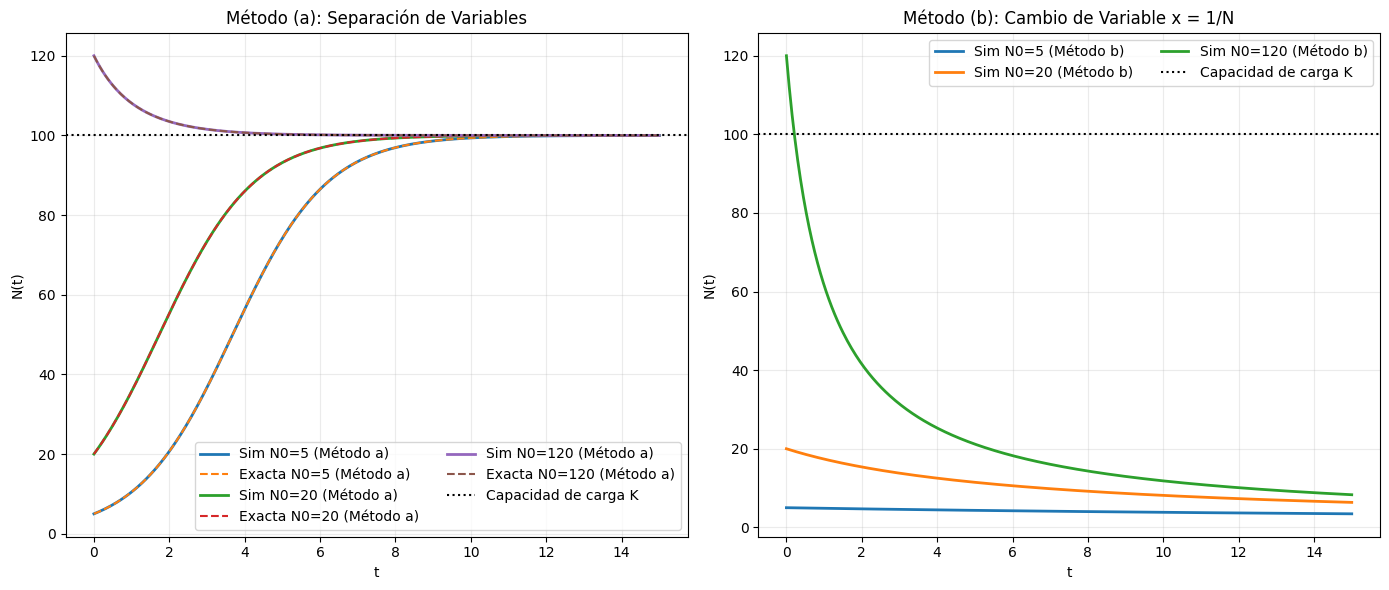

In [32]:
# ==========================================
# Ejercicio: Solución de la Ecuación Logística
# Método 1: Separación de Variables y Fracciones Parciales
# Método 2: Cambio de Variable x = 1/N
# ==========================================

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros
r = 0.8       # tasa intrínseca
K = 100.0     # capacidad de carga

# Método (a) - Ecuación logística: Separación de variables y fracciones parciales
def logistic_rhs(t, N):
    return r * N * (1 - N / K)

# Solución exacta para el modelo logístico (caso (a))
def logistic_exact(t, N0):
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

# Método (b) - Cambio de variable x = 1/N
def logistic_rhs_x(t, x):
    return r * (1 - x) / K  # Ecuación para x = 1/N

# Condiciones iniciales a comparar
N0_list = [5, 20, 120]  # por debajo, cerca y por encima de K
x0_list = [1 / N0 for N0 in N0_list]  # Cambio de variable x = 1/N
t_span = (0, 15)
t_eval = np.linspace(*t_span, 400)

# Crear la figura con 2 subgráficas (uno para cada método)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Método (a): Separación de variables y fracciones parciales
for N0 in N0_list:
    # Método (a) - Solución numérica con solve_ivp
    sol = solve_ivp(logistic_rhs, t_span, [N0], t_eval=t_eval, rtol=1e-10, atol=1e-12)

    # Graficar la solución numérica del método (a)
    ax1.plot(sol.t, sol.y[0], lw=2, label=f'Sim N0={N0} (Método a)')

    # Graficar la solución analítica del método (a)
    ax1.plot(t_eval, logistic_exact(t_eval, N0), ls='--', lw=1.5, label=f'Exacta N0={N0} (Método a)')

# Configuración del gráfico (a)
ax1.axhline(K, color='k', ls=':', lw=1.5, label='Capacidad de carga K')
ax1.set_xlabel('t')
ax1.set_ylabel('N(t)')
ax1.set_title('Método (a): Separación de Variables')
ax1.legend(ncols=2)
ax1.grid(True, alpha=0.25)

# Método (b): Cambio de variable x = 1/N
for N0 in N0_list:
    # Método (b) - Solución numérica para el cambio de variable x = 1/N
    sol_b = solve_ivp(logistic_rhs_x, t_span, [1 / N0], t_eval=t_eval, rtol=1e-10, atol=1e-12)

    # Convertir la solución para x a N
    N_b = 1 / sol_b.y[0]

    # Graficar la solución numérica del método (b)
    ax2.plot(sol_b.t, N_b, lw=2, label=f'Sim N0={N0} (Método b)')

# Configuración del gráfico (b)
ax2.axhline(K, color='k', ls=':', lw=1.5, label='Capacidad de carga K')
ax2.set_xlabel('t')
ax2.set_ylabel('N(t)')
ax2.set_title('Método (b): Cambio de Variable x = 1/N')
ax2.legend(ncols=2)
ax2.grid(True, alpha=0.25)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


## **2.4.2 Linear Stability Analysis - Ejercicio 2.4.2**

### Sistema: $\dot{x} = x(1 - x)(2 - x)$

* * *

### Enunciado

- Resuelve la ecuación diferencial $\dot{x} = x(1 - x)(2 - x)$ analíticamente para sus puntos fijos y clasifica su estabilidad.
- Realiza el análisis de estabilidad lineal de los puntos fijos.
- Si el análisis lineal falla porque $f'(x^*) = 0$, utiliza un argumento gráfico para decidir la estabilidad.

* * *

### Resolución Matemática

La ecuación es:

$$
\dot{x} = x(1 - x)(2 - x)
$$

#### Paso 1: Encontrar los puntos fijos

Los puntos fijos ocurren cuando:

$$
x(1 - x)(2 - x) = 0
$$

Esto se cumple cuando $x = 0$, $x = 1$, o $x = 2$. Por lo tanto, los puntos fijos son:

$$
x_1 = 0, \quad x_2 = 1, \quad x_3 = 2
$$

#### Paso 2: Análisis de estabilidad

Para analizar la estabilidad de los puntos fijos, calculamos la derivada de $f(x) = x(1 - x)(2 - x)$:

$$
f'(x) = (1 - x)(2 - x) - x(2 - x) - x(1 - x)
$$

Simplificando:

$$
f'(x) = -3x^2 + 6x - 2
$$

Evaluamos $f'(x)$ en cada punto fijo:

- En $x_1 = 0$:

$$
f'(0) = -3(0)^2 + 6(0) - 2 = -2
$$

Como $f'(0) < 0$, $x_1 = 0$ es un **punto estable**.

- En $x_2 = 1$:

$$
f'(1) = -3(1)^2 + 6(1) - 2 = 1
$$

Como $f'(1) > 0$, $x_2 = 1$ es un **punto inestable**.

- En $x_3 = 2$:

$$
f'(2) = -3(2)^2 + 6(2) - 2 = -2
$$

Como $f'(2) < 0$, $x_3 = 2$ es un **punto estable**.

#### **Conclusión Matemática**:

- $x_1 = 0$ es un **punto estable**.
- $x_2 = 1$ es un **punto inestable**.
- $x_3 = 2$ es un **punto estable**.

* * *

### **Análisis Gráfico y Simulación Numérica en Python**

Ahora, realizamos la simulación numérica para el sistema $\dot{x} = x(1 - x)(2 - x)$ y analizamos su comportamiento.

#### **Explicación del Análisis Gráfico**:

En la **gráfica** generada, se observan las siguientes condiciones iniciales y cómo cada una se comporta en rel

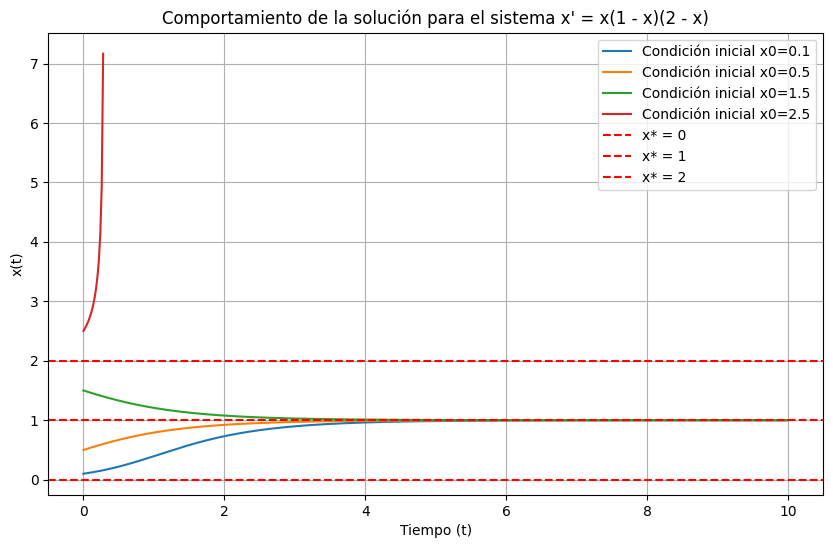

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir la función del sistema: x' = x(1 - x)(2 - x)
def system_2(t, x):
    return x * (1 - x) * (2 - x)

# Condiciones iniciales
x0_values = [0.1, 0.5, 1.5, 2.5]  # Diferentes condiciones iniciales para ver la dinámica
t_span = (0, 10)  # Intervalo de tiempo
t_eval = np.linspace(*t_span, 500)  # Puntos de evaluación para la solución

# Resolver la ecuación diferencial con solve_ivp
fig, ax = plt.subplots(figsize=(10, 6))

for x0 in x0_values:
    sol = solve_ivp(system_2, t_span, [x0], t_eval=t_eval, rtol=1e-10, atol=1e-12)
    ax.plot(sol.t, sol.y[0], label=f'Condición inicial x0={x0}')

# Graficar los puntos fijos en x = 0, 1, 2
x_fixed_points = [0, 1, 2]  # Puntos fijos
for x_fp in x_fixed_points:
    ax.axhline(x_fp, color='r', linestyle='--', label=f'x* = {x_fp}')

# Añadir detalles al gráfico
ax.set_xlabel('Tiempo (t)')
ax.set_ylabel('x(t)')
ax.set_title('Comportamiento de la solución para el sistema x\' = x(1 - x)(2 - x)')
ax.legend()
ax.grid(True)

plt.show()


## Conclusiones

A lo largo de este capítulo, hemos explorado la dinámica de sistemas unidimensionales a través de métodos analíticos, análisis de estabilidad lineal y simulaciones numéricas.



*   Para el sistema $\dot{x} = \sin(x)$, identificamos los puntos fijos en $x = k\pi$. Mediante el análisis lineal, determinamos que los puntos fijos en $k\pi$ con $k$ par son inestables, mientras que aquellos con $k$ impar son estables. La visualización del campo escalar y el flujo sobre la recta real confirmó esta estabilidad, mostrando cómo las trayectorias se alejan de los puntos inestables y se acercan a los estables. También derivamos y visualizamos la solución exacta para una condición inicial específica, validando el comportamiento predicho por el análisis de estabilidad.

*   En el caso del sistema $\dot{x} = x - x^3$, encontramos tres puntos fijos en $x = -1, 0, 1$. El análisis lineal reveló que $x = -1$ y $x = 1$ son puntos estables (atractores), mientras que $x = 0$ es un punto inestable (repulsor). El retrato de fase unidimensional ilustró cómo el campo vectorial dirige las trayectorias hacia los atractores, separadas por el repulsor central. Las simulaciones numéricas con diversas condiciones iniciales validaron este comportamiento, mostrando cómo las soluciones convergen a $-1$ o $1$ dependiendo de si la condición inicial es menor o mayor que $0$.

*   Para la ecuación logística $\dot{N} = rN\left(1 - \frac{N}{K}\right)$, exploramos dos métodos analíticos para encontrar la solución exacta para una condición inicial arbitraria $N_0$. Ambos métodos (separación de variables con fracciones parciales y cambio de variable) llevaron a la misma forma de solución, que describe el crecimiento poblacional asintótico hacia la capacidad de carga $K$. La interpretación de esta solución y los puntos de equilibrio ($N=0$ inestable, $N=K$ estable) concuerda con la teoría del modelo logístico. Las simulaciones numéricas también confirmaron la convergencia hacia $K$ para diferentes condiciones iniciales positivas.

*  Finalmente,para el sistema $\dot{x} = x(1 - x)(2 - x)$, identificamos los puntos fijos en $x = 0$, $x = 1$, y $x = 2$. El análisis de estabilidad lineal mostró que $x = 0$ y $x = 2$ son puntos estables, mientras que $x = 1$ es un punto inestable. Las simulaciones numéricas confirmaron que las trayectorias convergen hacia los puntos fijos estables ($0$ o $2$) dependiendo de la condición inicial, siendo el punto fijo inestable ($1$) un separador entre las cuencas de atracción.


En conjunto, estos ejemplos demuestran cómo la combinación de análisis matemático, interpretación gráfica y simulación numérica es fundamental para comprender el comportamiento cualitativo y cuantitativo de los sistemas dinámicos.